# Datasets

In [1]:
import numpy as np
import pandas as pd
import pyts
import altair as alt

## Real-Time Solar Wind Data
---
Real-Time Solar Wind (RTSW) data from the Advanced Composition Explorer (ACE) spacecraft are made available by the Space Weather Prediction Center (SWPC). Data is available [here](https://sohoftp.nascom.nasa.gov/sdb/goes/ace/daily/).

##### ACE RTSW Instruments:
- **MAG**    - Magnetometer
- **SWEPAM** - Solar Wind Electron Proton Alpha Monitor
- **EPAM**   - Electron Proton and Alpha Monitor
- **SIS**    - Solar Isotope Spectrometer

##### Average Intervals:
- **MAG**    - *1-min and 1-hour*
- **SWEPAM** - *1-min and 1-hour*
- **EPAM**   - *5-min and 1-hour*
- **SIS**    - *5-min and 1-hour*

### Electron Proton and Alpha Monitor
---

|Description                            | Format   |    Units         |     min/max|
|---------------------------------------|----------|------------------|----------|                         
|Differential electron flux 38-53 keV|    Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E8|
|Differential electron flux 175-315 keV|  Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E7|
|Differential proton flux 47-68 keV|      Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E8|
|Differential proton flux 115-195 keV|    Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E7|
|Differential proton flux 310-580 keV|    Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E7|
|Differential proton flux 1060-1900 keV|  Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E6|
|FP6p (761-1220 keV proton flux)    |     Float|  p/(cm2-sec-ster-MeV)|   0.00/1.0E7|
|Anisotropy Index                    |    Float|     Dimensionless    |    0.0/2.0|



In [2]:
epam = pd.read_csv("data/epam_clean.csv")
epam.shape

(1962946, 10)

In [3]:
epam.head(5)

,Unnamed: 0,38-53,175-315,47-65,112-187,310-580,761-1220,060-1910,anis_ratio,datetime
0,0,694.0,11.6,1130.0,123.0,6.65,0.633,0.193,0.90,2001-08-07 00:10:00
1,1,704.0,14.7,1210.0,120.0,7.18,0.946,0.252,0.68,2001-08-07 00:15:00
2,2,797.0,13.4,1560.0,131.0,7.67,0.889,0.321,1.38,2001-08-07 00:20:00
3,3,758.0,16.0,1490.0,139.0,8.00,0.666,0.234,0.89,2001-08-07 00:25:00
4,4,650.0,16.2,1360.0,133.0,7.18,0.903,0.190,0.43,2001-08-07 00:30:00


In [4]:
epam.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
epam['timestamp'] = pd.to_datetime(epam.datetime, format='%Y-%m-%d %H:%M:%S')
epam['date'] = epam.timestamp.dt.date
epam['date'] = epam['date'].astype('datetime64')
epam.drop(axis=1, columns=['datetime'], inplace=True)
epam.head(5)

,38-53,175-315,47-65,112-187,310-580,761-1220,060-1910,anis_ratio,timestamp,date
0,694.0,11.6,1130.0,123.0,6.65,0.633,0.193,0.90,2001-08-07 00:10:00,2001-08-07
1,704.0,14.7,1210.0,120.0,7.18,0.946,0.252,0.68,2001-08-07 00:15:00,2001-08-07
2,797.0,13.4,1560.0,131.0,7.67,0.889,0.321,1.38,2001-08-07 00:20:00,2001-08-07
3,758.0,16.0,1490.0,139.0,8.00,0.666,0.234,0.89,2001-08-07 00:25:00,2001-08-07
4,650.0,16.2,1360.0,133.0,7.18,0.903,0.190,0.43,2001-08-07 00:30:00,2001-08-07


 ### Solar Wind Electron Proton Alpha Monitor
 ---
 
|Description|                                   Format|    Units|         min/max|  
|-----------|------------------------------------------|---------|----------------|
|Solar wind proton density|                      Float|     p/cc|       0.0 /  200.0|
|Solar wind bulk speed     |                     Float|    km/s |   200.0 / 2000.0|
|Solar wind ion temperature |                    Float| degrees K|  1.00E4 / 1.00E7|

 

In [5]:
swepam = pd.read_csv('data/swepam_clean.csv')
swepam.shape

(8506059, 5)

In [6]:
swepam.head(5)

,Unnamed: 0,proton_density,bulk_speed,ion_temperature,datetime
0,0,3.2,443.1,68800.0,2001-08-07 00:02:00
1,1,3.2,443.5,64300.0,2001-08-07 00:03:00
2,2,3.2,446.1,71200.0,2001-08-07 00:04:00
3,3,3.3,446.3,68900.0,2001-08-07 00:05:00
4,4,3.3,446.3,68900.0,2001-08-07 00:06:00


In [7]:
swepam.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
swepam['timestamp'] = pd.to_datetime(swepam.datetime, format='%Y-%m-%d %H:%M:%S')
swepam['date'] = swepam.timestamp.dt.date
swepam['date'] = swepam['date'].astype('datetime64')
swepam.drop(axis=1, columns=['datetime'], inplace=True)
swepam.head(5)

,proton_density,bulk_speed,ion_temperature,timestamp,date
0,3.2,443.1,68800.0,2001-08-07 00:02:00,2001-08-07
1,3.2,443.5,64300.0,2001-08-07 00:03:00,2001-08-07
2,3.2,446.1,71200.0,2001-08-07 00:04:00,2001-08-07
3,3.3,446.3,68900.0,2001-08-07 00:05:00,2001-08-07
4,3.3,446.3,68900.0,2001-08-07 00:06:00,2001-08-07


### Magnetometer
---

|Description|                             Format|       Units|          min/max|
|-----------|-----------------------------------|------------|-----------------|
|IMF X-component in GSM coordinates|       Float|         nT|        -200.0 / 200.0|
|IMF Y-component in GSM coordinates|       Float|         nT|       -200.0 / 200.0|
|IMF Z-component in GSM coordinates|       Float|         nT|        -200.0 / 200.0|
|IMF component magnitude           |       Float|         nT|           0.0 / 200.0|
|IMF latitude in GSM coordinates   |       Float|       degrees|      -90.0 / 90.0|
|IMF longitude in GSM coordinates  |       Float|       degrees|        0.0 / 360.0|


In [8]:
mag = pd.read_csv('data/mag_clean.csv')
mag.shape

(9993374, 8)

In [9]:
mag.head(5)

,Unnamed: 0,Bx,By,Bz,Bt,Lat.,Long.,datetime
0,0,-6.2,-3.1,-0.1,6.9,-0.6,206.5,2001-08-07 00:00:00
1,1,-6.3,-3.3,-0.3,7.1,-2.7,207.8,2001-08-07 00:01:00
2,2,-6.2,-3.1,-0.6,6.9,-4.7,206.5,2001-08-07 00:02:00
3,3,-6.1,-3.4,-0.6,7.0,-4.8,209.2,2001-08-07 00:03:00
4,4,-6.1,-3.5,-0.4,7.0,-3.1,210.0,2001-08-07 00:04:00


In [10]:
mag.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
mag['timestamp'] = pd.to_datetime(mag.datetime, format='%Y-%m-%d %H:%M:%S')
mag['date'] = mag.timestamp.dt.date
mag['date'] = mag['date'].astype('datetime64')
mag.drop(axis=1, columns=['datetime'], inplace=True)
mag.head(5)

,Bx,By,Bz,Bt,Lat.,Long.,timestamp,date
0,-6.2,-3.1,-0.1,6.9,-0.6,206.5,2001-08-07 00:00:00,2001-08-07
1,-6.3,-3.3,-0.3,7.1,-2.7,207.8,2001-08-07 00:01:00,2001-08-07
2,-6.2,-3.1,-0.6,6.9,-4.7,206.5,2001-08-07 00:02:00,2001-08-07
3,-6.1,-3.4,-0.6,7.0,-4.8,209.2,2001-08-07 00:03:00,2001-08-07
4,-6.1,-3.5,-0.4,7.0,-3.1,210.0,2001-08-07 00:04:00,2001-08-07


### Solar Isotope Spectrometer
---

|Description|                             Format|       Units|             min/max|
|-----------|-----------------------------------|------------|--------------------|
|Integral proton flux at >10 MeV|         Float|  p/(cm2-sec-ster)|     0.00 / 1.00E5|
|Integral proton flux at >30 MeV|         Float|  p/(cm2-sec-ster)|    >0.00 / 1.00E5|

In [11]:
sis = pd.read_csv('data/sis_clean.csv')
sis.shape

(2009789, 4)

In [12]:
sis.head(5)

,Unnamed: 0,> 10 MeV,> 30 MeV,datetime
0,0,0.831,0.587,2001-08-07 00:20:00
1,1,0.820,0.574,2001-08-07 00:25:00
2,2,0.821,0.576,2001-08-07 00:30:00
3,3,0.805,0.571,2001-08-07 00:35:00
4,4,0.809,0.574,2001-08-07 00:40:00


In [13]:
sis.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
sis['timestamp'] = pd.to_datetime(sis.datetime, format='%Y-%m-%d %H:%M:%S')
sis['date'] = sis.timestamp.dt.date
sis['date'] = sis['date'].astype('datetime64') 
sis.drop(axis=1, columns=['datetime'], inplace=True)
sis.head(5)

,> 10 MeV,> 30 MeV,timestamp,date
0,0.831,0.587,2001-08-07 00:20:00,2001-08-07
1,0.820,0.574,2001-08-07 00:25:00,2001-08-07
2,0.821,0.576,2001-08-07 00:30:00,2001-08-07
3,0.805,0.571,2001-08-07 00:35:00,2001-08-07
4,0.809,0.574,2001-08-07 00:40:00,2001-08-07


## Data visualization
---
We are visualizing mean daily value for each column in each dataset. Charts are interactive. They can be zoomed in or out and scrolled left and right.

In [14]:
# Split the data into two periods because the maximum number of values 
# that can be displayed using altair.Chart() is 5000. These two periods cover all data.
period_1 = pd.date_range(start='2001-08-07', end='2014-12-31')
period_2 = pd.date_range(start='2015-01-01', end='2022-05-02')

### Electron Proton and Alpha Monitor data visualization
---

In [15]:
epam_mean = epam.groupby(['date']).mean().reset_index()

In [16]:
epam_mean_split_1 = epam_mean[epam_mean['date'].isin(period_1)]
epam_mean_split_2 = epam_mean[epam_mean['date'].isin(period_2)]

#### Split 1 - 2001-2014

In [17]:
chart1 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='38-53:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='175-315:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='47-65:Q',
).interactive(bind_y=False)

chart4 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='112-187:Q',
).interactive(bind_y=False)

chart5 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='310-580:Q',
).interactive(bind_y=False)

chart6 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='761-1220:Q',
).interactive(bind_y=False)

chart7 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='060-1910:Q',
).interactive(bind_y=False)

chart8 = alt.Chart(epam_mean_split_1).mark_line().encode(
  x='date:T',
  y='anis_ratio:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 | chart3 | chart4, chart5 | chart6 | chart7 | chart8).properties(
    title='Electron Proton and Alpha Monitor mean data visualization - split 1/2, 2001-2014  [charts are interactive: scroll to zoom, drag to slide]'
).configure_title(
    fontSize=30
)
chart.save('charts/epam_mean_chart_split_1.html')

#### To view the chart, click here : [<span style="color:blue">EPAM Chart Split 1</span>](charts/epam_mean_chart_split_1.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

#### Split 2 - 2015-2022

In [18]:
chart1 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='38-53:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='175-315:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='47-65:Q',
).interactive(bind_y=False)

chart4 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='112-187:Q',
).interactive(bind_y=False)

chart5 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='310-580:Q',
).interactive(bind_y=False)

chart6 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='761-1220:Q',
).interactive(bind_y=False)

chart7 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='060-1910:Q',
).interactive(bind_y=False)

chart8 = alt.Chart(epam_mean_split_2).mark_line().encode(
  x='date:T',
  y='anis_ratio:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 | chart3 | chart4, chart5 | chart6 | chart7 | chart8).properties(
    title='Electron Proton and Alpha Monitor mean data visualization - split 2/2, 2015-2022 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/epam_mean_chart_split_2.html')

#### To view the chart, click here : [<span style="color:blue">EPAM Chart Split 2</span>](charts/epam_mean_chart_split_2.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

### Solar Wind Electron Proton Alpha Monitor data visualization
---

In [19]:
swepam_mean = swepam.groupby(['date']).mean().reset_index()

In [20]:
swepam_mean_split_1 = swepam_mean[swepam_mean['date'].isin(period_1)]
swepam_mean_split_2 = swepam_mean[swepam_mean['date'].isin(period_2)]

#### Split 1 - 2001-2014

In [21]:
chart1 = alt.Chart(swepam_mean_split_1).mark_line().encode(
  x='date:T',
  y='proton_density:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(swepam_mean_split_1).mark_line().encode(
  x='date:T',
  y='bulk_speed:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(swepam_mean_split_1).mark_line().encode(
  x='date:T',
  y='ion_temperature:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 , chart3).properties(
    title='Solar Wind Electron Proton Alpha Monitor mean data visualization - split 1/2, 2001-2014 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/swepam_mean_chart_split_1.html')

#### To view the chart, click here : [<span style="color:blue">SWEPAM Chart Split 1</span>](charts/swepam_mean_chart_split_1.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

#### Split 2 - 2015-2022

In [22]:
chart1 = alt.Chart(swepam_mean_split_2).mark_line().encode(
  x='date:T',
  y='proton_density:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(swepam_mean_split_2).mark_line().encode(
  x='date:T',
  y='bulk_speed:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(swepam_mean_split_2).mark_line().encode(
  x='date:T',
  y='ion_temperature:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 , chart3).properties(
    title='Solar Wind Electron Proton Alpha Monitor mean data visualization - split 2/2, 2015-2022 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/swepam_mean_chart_split_2.html')

#### To view the chart, click here : [<span style="color:blue">SWEPAM Chart Split 2</span>](charts/swepam_mean_chart_split_2.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

### Magnetometer data visualization
---

In [23]:
mag_mean = mag.groupby(['date']).mean().reset_index()

In [24]:
mag_mean_split_1 = mag_mean[mag_mean['date'].isin(period_1)]
mag_mean_split_2 = mag_mean[mag_mean['date'].isin(period_2)]

#### Split 1 - 2001-2014

In [25]:
chart1 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='Bx:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='By:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='Bz:Q',
).interactive(bind_y=False)

chart4 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='Bt:Q',
).interactive(bind_y=False)

chart5 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='Lat\.:Q',
).interactive(bind_y=False)

chart6 = alt.Chart(mag_mean_split_1).mark_line().encode(
  x='date:T',
  y='Long\.:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 | chart3, chart4 | chart5 | chart6).properties(
    title='Magnetometer mean data visualization - split 1/2, 2001-2014 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/mag_mean_chart_split_1.html')

#### To view the chart, click here : [<span style="color:blue">MAG Chart Split 1</span>](charts/mag_mean_chart_split_1.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

#### Split 2 - 2015-2022

In [26]:
chart1 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='Bx:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='By:Q',
).interactive(bind_y=False)

chart3 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='Bz:Q',
).interactive(bind_y=False)

chart4 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='Bt:Q',
).interactive(bind_y=False)

chart5 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='Lat\.:Q',
).interactive(bind_y=False)

chart6 = alt.Chart(mag_mean_split_2).mark_line().encode(
  x='date:T',
  y='Long\.:Q',
).interactive(bind_y=False)

chart = alt.vconcat(chart1 | chart2 | chart3, chart4 | chart5 | chart6).properties(
    title='Magnetometer mean data visualization - split 2/2, 2015-2022 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/mag_mean_chart_split_2.html')

#### To view the chart, click here : [<span style="color:blue">MAG Chart Split 2</span>](charts/mag_mean_chart_split_2.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

### Solar Isotope Spectrometer data visualization
---

In [27]:
sis_mean = sis.groupby(['date']).mean().reset_index()

In [28]:
sis_mean_split_1 = sis_mean[sis_mean['date'].isin(period_1)]
sis_mean_split_2 = sis_mean[sis_mean['date'].isin(period_2)]

#### Split 1 - 2001-2014

In [29]:
chart1 = alt.Chart(sis_mean_split_1).mark_line().encode(
  x='date:T',
  y='> 10 MeV:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(sis_mean_split_1).mark_line().encode(
  x='date:T',
  y='> 30 MeV:Q',
).interactive(bind_y=False)

chart = (chart1 | chart2).properties(
    title='Solar Isotope Spectrometer mean data visualization - split 1/2, 2001-2014 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/sis_mean_chart_split_1.html')

#### To view the chart, click here : [<span style="color:blue">SIS Chart Split 1</span>](charts/sis_mean_chart_split_1.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

#### Split 2 - 2015-2022

In [30]:
chart1 = alt.Chart(sis_mean_split_2).mark_line().encode(
  x='date:T',
  y='> 10 MeV:Q',
).interactive(bind_y=False)

chart2 = alt.Chart(sis_mean_split_2).mark_line().encode(
  x='date:T',
  y='> 30 MeV:Q',
).interactive(bind_y=False)

chart = (chart1 | chart2).properties(
    title='Solar Isotope Spectrometer mean data visualization - split 2/2, 2015-2022 [charts are interactive: scroll to zoom, drag to slide]' 
).configure_title(
    fontSize=30
)
chart.save('charts/sis_mean_chart_split_2.html')

#### To view the chart, click here : [<span style="color:blue">SIS Chart Split 2</span>](charts/sis_mean_chart_split_2.html)
> NOTE: If charts do not display on GitHub, download charts/ folder and open html pages in browser.

## Datasets statistics 

### Electron Proton and Alpha Monitor
---

In [31]:
epam.describe()

,38-53,175-315,47-65,112-187,310-580,761-1220,060-1910,anis_ratio
count,1.962946e+06,1.962946e+06,1.962946e+06,1.962946e+06,1.962946e+06,1.962946e+06,1.962946e+06,1.962946e+06
mean,1.520371e+04,6.261688e+02,1.361767e+04,2.815987e+03,3.192554e+02,1.138035e+02,4.525672e+01,-2.984247e-01
std,2.140501e+05,1.530765e+04,1.748178e+05,4.626019e+04,8.497807e+03,2.364054e+03,9.400059e+02,7.290152e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,5.100000e+02,2.080000e+01,1.040000e+03,1.880000e+01,2.310000e+00,5.720000e-01,1.470000e-01,-1.000000e+00
50%,7.660000e+02,2.660000e+01,1.640000e+03,2.340000e+01,2.970000e+00,7.810000e-01,2.170000e-01,2.000000e-02
75%,1.330000e+03,3.210000e+01,2.870000e+03,7.910000e+01,9.920000e+00,2.680000e+00,8.020000e-01,3.200000e-01
max,5.790000e+07,4.460000e+06,2.070000e+07,8.730000e+06,6.050000e+06,1.600000e+06,5.140000e+05,2.000000e+00


In [32]:
epam.corr()

,38-53,175-315,47-65,112-187,310-580,761-1220,060-1910,anis_ratio
38-53,1.000000,0.777515,0.171556,0.177825,0.179626,0.338329,0.412222,0.011687
175-315,0.777515,1.000000,0.130885,0.164507,0.161827,0.281207,0.360083,0.008577
47-65,0.171556,0.130885,1.000000,0.828339,0.198347,0.138359,0.176178,0.027232
112-187,0.177825,0.164507,0.828339,1.000000,0.450144,0.291040,0.291762,0.021568
310-580,0.179626,0.161827,0.198347,0.450144,1.000000,0.433151,0.474284,0.001558
761-1220,0.338329,0.281207,0.138359,0.291040,0.433151,1.000000,0.650580,0.001081
060-1910,0.412222,0.360083,0.176178,0.291762,0.474284,0.650580,1.000000,0.003481
anis_ratio,0.011687,0.008577,0.027232,0.021568,0.001558,0.001081,0.003481,1.000000


### Solar Wind Electron Proton Alpha Monitor
---


In [33]:
swepam.describe()

,proton_density,bulk_speed,ion_temperature
count,8.506059e+06,8.506059e+06,8.506059e+06
mean,3.643107e+00,4.276234e+02,9.294717e+04
std,3.909584e+00,1.008328e+02,8.480196e+04
min,0.000000e+00,2.284000e+02,1.000000e+04
25%,1.500000e+00,3.548000e+02,3.770000e+04
50%,2.700000e+00,4.042000e+02,6.670000e+04
75%,4.600000e+00,4.768000e+02,1.200000e+05
max,1.998000e+02,1.341300e+03,5.020000e+06


In [34]:
swepam.corr()

,proton_density,bulk_speed,ion_temperature
proton_density,1.000000,-0.161685,-0.080872
bulk_speed,-0.161685,1.000000,0.726086
ion_temperature,-0.080872,0.726086,1.000000


### Magnetometer
---


In [35]:
mag.describe()

,Bx,By,Bz,Bt,Lat.,Long.
count,9.993374e+06,9.993374e+06,9.993374e+06,9.993374e+06,9.993374e+06,9.993374e+06
mean,-4.935891e-01,-7.317415e-02,1.667067e-02,5.490971e+00,3.053756e-01,1.979020e+02
std,3.623578e+00,3.831787e+00,3.377525e+00,3.052438e+00,3.353761e+01,9.809418e+01
min,-4.540000e+01,-7.430000e+01,-6.900000e+01,0.000000e+00,-8.990000e+01,0.000000e+00
25%,-3.100000e+00,-2.500000e+00,-1.800000e+00,3.600000e+00,-2.300000e+01,1.260000e+02
50%,-4.000000e-01,-1.000000e-01,0.000000e+00,4.800000e+00,2.000000e-01,1.843000e+02
75%,2.100000e+00,2.300000e+00,1.800000e+00,6.600000e+00,2.360000e+01,2.911000e+02
max,1.232000e+02,5.840000e+01,6.290000e+01,1.394000e+02,9.000000e+01,3.600000e+02


In [36]:
mag.corr()

,Bx,By,Bz,Bt,Lat.,Long.
Bx,1.000000,-0.349686,0.079635,-0.126648,0.061051,0.303934
By,-0.349686,1.000000,-0.047069,0.044394,-0.037519,-0.661557
Bz,0.079635,-0.047069,1.000000,-0.011072,0.861676,0.038422
Bt,-0.126648,0.044394,-0.011072,1.000000,-0.004407,-0.024714
Lat.,0.061051,-0.037519,0.861676,-0.004407,1.000000,0.037495
Long.,0.303934,-0.661557,0.038422,-0.024714,0.037495,1.000000


### Solar Isotope Spectrometer
---


In [37]:
sis.describe()

,> 10 MeV,> 30 MeV
count,2.009789e+06,2.009789e+06
mean,2.578156e+01,1.002080e+01
std,4.129353e+02,2.017720e+02
min,1.890000e-01,1.100000e-01
25%,1.230000e+00,8.380000e-01
50%,1.800000e+00,1.200000e+00
75%,2.260000e+00,1.550000e+00
max,1.230000e+04,7.490000e+03


In [38]:
sis.corr()

,> 10 MeV,> 30 MeV
> 10 MeV,1.000000,0.932845
> 30 MeV,0.932845,1.000000


## Making listed timeseries for each day

We are grouping values in a list by date. So, at the end, in each column for each date, we have a list of measured values for that day. This representation will later be used in Symbolic Fourier Transform (SFA) for aggregation of values in list.



In [39]:
epam_wanted_columns = ['38-53', '175-315', '47-65', '112-187', '310-580',
                       '761-1220', '060-1910', 'anis_ratio', 'date']
epam_agg_grouped = epam[epam_wanted_columns].groupby(['date'])
epam_listed = epam_agg_grouped[epam_wanted_columns[:-1]].agg(lambda x : list(x.to_numpy()))
epam_listed.set_index(pd.DatetimeIndex(epam_listed.index), inplace=True)
epam_listed.to_csv("data/rtsw_listed/epam_listed.csv")

In [40]:
epam_listed.head(5)

,38-53,175-315,47-65,112-187,310-580,761-1220,060-1910,anis_ratio
date,,,,,,,,
2001-08-07,"[694.0, 704.0, 797.0, 758.0, 650.0, 712.0, 724...","[11.6, 14.7, 13.4, 16.0, 16.2, 13.1, 14.9, 18....","[1130.0, 1210.0, 1560.0, 1490.0, 1360.0, 1110....","[123.0, 120.0, 131.0, 139.0, 133.0, 117.0, 126...","[6.65, 7.18, 7.67, 8.0, 7.18, 6.49, 6.26, 9.33...","[0.633, 0.946, 0.889, 0.666, 0.903, 0.925, 0.6...","[0.193, 0.252, 0.321, 0.234, 0.19, 0.257, 0.27...","[0.9, 0.68, 1.38, 0.89, 0.43, 0.83, 0.94, 1.02..."
2001-08-08,"[727.0, 717.0, 822.0, 759.0, 815.0, 702.0, 706...","[17.8, 14.8, 14.5, 14.7, 16.6, 14.7, 17.1, 14....","[281.0, 276.0, 298.0, 294.0, 265.0, 275.0, 242...","[31.2, 36.4, 31.8, 34.6, 35.8, 31.6, 35.9, 29....","[2.49, 2.68, 2.08, 2.7, 2.28, 2.21, 2.25, 2.32...","[0.536, 0.398, 0.463, 0.592, 0.688, 0.399, 0.5...","[0.191, 0.0919, 0.123, 0.213, 0.141, 0.148, 0....","[0.92, 1.26, 0.29, 1.64, 0.35, 1.41, 1.41, 0.6..."
2001-08-09,"[725.0, 726.0, 651.0, 661.0, 752.0, 743.0, 709...","[14.0, 18.0, 16.7, 14.2, 14.5, 12.3, 14.0, 15....","[147.0, 124.0, 166.0, 151.0, 163.0, 173.0, 159...","[21.2, 18.6, 21.9, 23.1, 19.0, 21.2, 25.2, 20....","[2.45, 1.45, 1.66, 1.48, 1.5, 1.61, 1.99, 1.74...","[0.339, 0.455, 0.422, 0.543, 0.365, 0.34, 0.37...","[0.148, 0.246, 0.18, 0.142, 0.216, 0.162, 0.13...","[2.0, 0.98, 2.0, 0.8, -1.0, 2.0, 1.57, 1.85, 2..."
2001-08-10,"[14200.0, 13100.0, 13300.0, 13500.0, 13600.0, ...","[97.2, 93.1, 90.4, 93.2, 92.9, 92.6, 78.5, 80....","[381.0, 358.0, 381.0, 325.0, 307.0, 447.0, 422...","[411.0, 405.0, 421.0, 524.0, 501.0, 388.0, 139...","[942.0, 936.0, 934.0, 1070.0, 1090.0, 960.0, 4...","[677.0, 674.0, 660.0, 739.0, 743.0, 663.0, 376...","[342.0, 316.0, 316.0, 341.0, 350.0, 305.0, 175...","[0.72, 0.77, 0.76, 0.78, 0.73, 0.44, 0.21, 0.1..."
2001-08-11,"[4820.0, 4640.0, 4510.0, 4520.0, 4700.0, 4620....","[35.9, 31.4, 35.4, 33.5, 31.7, 31.9, 32.8, 31....","[11400.0, 11600.0, 11400.0, 11000.0, 11400.0, ...","[12000.0, 12400.0, 11900.0, 11400.0, 11900.0, ...","[5610.0, 5700.0, 5530.0, 5420.0, 5690.0, 6340....","[2220.0, 2230.0, 2200.0, 2230.0, 2250.0, 2380....","[898.0, 894.0, 889.0, 888.0, 907.0, 943.0, 965...","[0.17, 0.17, 0.17, 0.21, 0.22, 0.21, 0.2, 0.15..."


In [41]:
swepam_wanted_columns = ['proton_density', 'bulk_speed', 'ion_temperature', 'date']
swepam_agg_grouped = swepam[swepam_wanted_columns].groupby(['date'])
swepam_listed = swepam_agg_grouped[swepam_wanted_columns[:-1]].agg(lambda x : list(x.to_numpy()))
swepam_listed.set_index(pd.DatetimeIndex(swepam_listed.index), inplace=True)
swepam_listed.to_csv("data/rtsw_listed/swepam_listed.csv")

In [42]:
mag_wanted_columns = ['Bx', 'By', 'Bz', 'Bt', 'Lat.', 'Long.', 'date']
mag_agg_grouped = mag[mag_wanted_columns].groupby(['date'])
mag_listed = mag_agg_grouped[mag_wanted_columns[:-1]].agg(lambda x : list(x.to_numpy()))
mag_listed.set_index(pd.DatetimeIndex(mag_listed.index), inplace=True)
mag_listed.to_csv("data/rtsw_listed/mag_listed.csv")

In [43]:
sis_wanted_columns = ['> 10 MeV', '> 30 MeV', 'date']
sis_agg_grouped = sis[sis_wanted_columns].groupby(['date'])
sis_listed = sis_agg_grouped[sis_wanted_columns[:-1]].agg(lambda x : list(x.to_numpy()))
sis_listed.set_index(pd.DatetimeIndex(sis_listed.index), inplace=True)
sis_listed.to_csv("data/rtsw_listed/sis_listed.csv")

# Missing values
#### Calculating number of measurements per day for each column

In [44]:
epam_listed_columns = ['38-53', '175-315', '47-65', '112-187', '310-580',
                        '761-1220', '060-1910', 'anis_ratio']
epam_max_number_of_measurements_per_day = {}
for column_name in epam_listed_columns:
    max_list_length = 0
    for index, row in epam_listed.iterrows():
        list_length = len(row[column_name])
        if max_list_length < list_length:
            max_list_length = list_length
    epam_max_number_of_measurements_per_day[column_name] = max_list_length

In [45]:
epam_max_number_of_measurements_per_day

{'38-53': 286,
 '175-315': 286,
 '47-65': 286,
 '112-187': 286,
 '310-580': 286,
 '761-1220': 286,
 '060-1910': 286,
 'anis_ratio': 286}

In [46]:
sis_listed_columns = ['> 10 MeV', '> 30 MeV']
sis_max_number_of_measurements_per_day = {}
for column_name in sis_listed_columns:
    max_list_length = 0
    for index, row in sis_listed.iterrows():
        list_length = len(row[column_name])
        if max_list_length < list_length:
            max_list_length = list_length
    sis_max_number_of_measurements_per_day[column_name] = max_list_length

In [47]:
sis_max_number_of_measurements_per_day

{'> 10 MeV': 284, '> 30 MeV': 284}

In [48]:
mag_listed_columns = ['Bx', 'By', 'Bz', 'Bt', 'Lat.', 'Long.']
mag_max_number_of_measurements_per_day = {}
for column_name in mag_listed_columns:
    max_list_length = 0
    for index, row in mag_listed.iterrows():
        list_length = len(row[column_name])
        if max_list_length < list_length:
            max_list_length = list_length
    mag_max_number_of_measurements_per_day[column_name] = max_list_length

In [49]:
mag_max_number_of_measurements_per_day

{'Bx': 1440, 'By': 1440, 'Bz': 1440, 'Bt': 1440, 'Lat.': 1440, 'Long.': 1440}

In [50]:
swepam_listed_columns = ['proton_density', 'bulk_speed', 'ion_temperature']
swepam_max_number_of_measurements_per_day = {}
for column_name in swepam_listed_columns:
    max_list_length = 0
    for index, row in swepam_listed.iterrows():
        list_length = len(row[column_name])
        if max_list_length < list_length:
            max_list_length = list_length
    swepam_max_number_of_measurements_per_day[column_name] = max_list_length

In [51]:
swepam_max_number_of_measurements_per_day

{'proton_density': 1423, 'bulk_speed': 1423, 'ion_temperature': 1423}

### Missing values - Conclusion
24 * 12 = 288    - number of 5 min intervals per day

24 * 60 = 1440   - number of 1 min intervals per day

EPAM and SIS values are measured once every 5 min per day. SWEPAM and MAG values are measured once every 1 min per day.

The values above show the highest number of measurements in one day, but it does not mean that this number of measurements was performed every day. Those are missing values in our sets. But we won't fill them bacuse they do not affect Symbolic Fourier Transformation.


## Flood data
---

In [52]:
floods = pd.read_csv("data/floods.csv", index_col="date").drop(["Unnamed: 0"], axis =1)
floods_new = pd.read_csv("data/floodphenomena.csv")

In [53]:
floods.head(5)

,flood
date,
2008-08-27,False
2008-08-28,False
2008-08-29,False
2008-08-30,False
2008-08-31,False


In [54]:
floods = floods.reset_index()
floods.head()

,date,flood
0,2008-08-27,False
1,2008-08-28,False
2,2008-08-29,False
3,2008-08-30,False
4,2008-08-31,False


In [55]:
floods_new.head(5)

,cc,FloodPhenomenaID,Year,StartDate,EndDate,Number_FE,Number_FL,EUUOMCODE,FP_Severity,FP_Duration,FP_Extension,SourceOfFlooding,CharacteristicsOfFlooding,MechanismOfFlooding,FrequencyCategory,Area,Source,OtherSources
0,AL,AL-1992-11-17,1992,17/11/1992,19/11/1992,NaN,NaN,NaN,Very High,2.0,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
1,AL,AL-1995-08-19,1995,19/08/1995,26/08/1995,NaN,NaN,NaN,Very High,8.0,NaN,NaN,NaN,NaN,NaN,NaN,DFO,NaN
2,AL,AL-1995-09-20,1995,20/09/1995,20/09/1995,NaN,NaN,NaN,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
3,AL,AL-1995-09-21,1995,21/09/1995,24/09/1995,NaN,NaN,NaN,Very High,4.0,NaN,NaN,NaN,NaN,NaN,NaN,DFO,NaN
4,AL,AL-1995-12-27,1995,27/12/1995,27/12/1995,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN


From *floodphenomena* set we are intrested in "StartDate" column because that is the day when the flood happened.

In [56]:
start_date = pd.to_datetime(floods_new["StartDate"], infer_datetime_format=True)

In [57]:
min(start_date.values)

numpy.datetime64('1980-01-15T00:00:00.000000000')

We see that minimum date value of "StartDate" is '1980-01-15' but our Solar Wind Real Time data start from 2001-08-07. So, we will cut off the excess data.

In [58]:
date = pd.to_datetime(floods['date'], infer_datetime_format=True)

In [59]:
min(date)

Timestamp('2002-07-20 00:00:00')

We have no problem with excess data in *flood* set. 

### Datasets statistics 

In [60]:
floods.describe()

,date,flood
count,304,304
unique,291,2
top,2007-06-17,False
freq,2,285


In [61]:
floods_new.describe()

,Year,Number_FE,Number_FL,FP_Duration,Area
count,3695.00000,3271.000000,2823.000000,2244.000000,580.000000
mean,1998.75724,3.371446,3.308183,4.986185,46.723063
std,9.11274,38.202725,40.945435,10.501270,284.861035
min,1980.00000,0.000000,0.000000,1.000000,0.010000
25%,1992.00000,1.000000,1.000000,1.000000,0.267500
50%,2001.00000,1.000000,1.000000,2.000000,1.205000
75%,2006.00000,1.000000,1.000000,4.000000,7.040000
max,2015.00000,2116.000000,2116.000000,186.000000,3800.000000


In [62]:
floods_new.corr()

,Year,Number_FE,Number_FL,FP_Duration,Area
Year,1.000000,0.029347,0.032660,0.084487,0.057903
Number_FE,0.029347,1.000000,0.999789,0.377324,0.441733
Number_FL,0.032660,0.999789,1.000000,0.375526,0.441798
FP_Duration,0.084487,0.377324,0.375526,1.000000,0.479843
Area,0.057903,0.441733,0.441798,0.479843,1.000000


### Missing values

In [63]:
bool_series = pd.isnull(floods_new["StartDate"])

In [64]:
floods_new[bool_series]

,cc,FloodPhenomenaID,Year,StartDate,EndDate,Number_FE,Number_FL,EUUOMCODE,FP_Severity,FP_Duration,FP_Extension,SourceOfFlooding,CharacteristicsOfFlooding,MechanismOfFlooding,FrequencyCategory,Area,Source,OtherSources
76,AT,AT-AT3000701,2010,NaN,NaN,1.0,1.0,AT1000,Moderate,NaN,NaN,Fluvial,NaN,Natural exceedance,NaN,NaN,FD,NaN
77,AT,AT-AT3000702,2001,NaN,NaN,1.0,1.0,AT1000,Moderate,NaN,NaN,Fluvial,NaN,Natural exceedance,NaN,NaN,FD,NaN
78,AT,AT-AT3001400,2002,NaN,NaN,1.0,1.0,AT1000,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FD,NaN
79,AT,AT-AT4000500,1987,NaN,NaN,1.0,1.0,AT1000,Moderate,NaN,NaN,Fluvial,Debris flow,Natural exceedance,NaN,NaN,FD,NaN
80,AT,AT-AT4009400,1998,NaN,NaN,1.0,1.0,AT1000,Moderate,NaN,NaN,Fluvial,High velocity flow,Natural exceedance,NaN,NaN,FD,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,UK,UK-UKSCFE4032,2002,NaN,NaN,1.0,1.0,UK01,Very High,NaN,NaN,Fluvial,NaN,NaN,NaN,NaN,FD,NaN
3683,UK,UK-UKSCFE5261,2007,NaN,NaN,1.0,1.0,UK01,Very High,NaN,NaN,Pluvial,NaN,NaN,NaN,NaN,FD,NaN
3684,UK,UK-UKSCFE6646,1997,NaN,NaN,1.0,1.0,UK01,Moderate,NaN,NaN,Fluvial,NaN,NaN,NaN,NaN,FD,NaN
3685,UK,UK-UKSCFE8408,1989,NaN,NaN,1.0,1.0,UK01,Very High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FD,NaN


We have missing values in "StartDate" column from floodphenomena set. We are interested in dates, but unfortunately we cannot fill in the missing dates. So we will drop those values.

In [65]:
bool_series_1 = pd.isnull(floods["date"])

In [66]:
floods[bool_series_1]

,date,flood


We have no missing values in flood set.

### Class balance
We want to see the number of days when there were floods compared to the days when there were no floods. This information is important because the main task is to predict that a flood will occur on a certain date.

In [67]:
from datetime import datetime

In [68]:
# Period for which we have data on Real Time Solar Wind
period_of_intrest = pd.date_range(start='2001-08-07', end='2022-05-02')

In [69]:
period_of_intrest

DatetimeIndex(['2001-08-07', '2001-08-08', '2001-08-09', '2001-08-10',
               '2001-08-11', '2001-08-12', '2001-08-13', '2001-08-14',
               '2001-08-15', '2001-08-16',
               ...
               '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30',
               '2022-05-01', '2022-05-02'],
              dtype='datetime64[ns]', length=7574, freq='D')

In [70]:
# Geeting rid off missing values
floods_new = floods_new[(floods_new["StartDate"].notna())]
r = pd.isnull(floods_new["StartDate"])
floods_new[r]

,cc,FloodPhenomenaID,Year,StartDate,EndDate,Number_FE,Number_FL,EUUOMCODE,FP_Severity,FP_Duration,FP_Extension,SourceOfFlooding,CharacteristicsOfFlooding,MechanismOfFlooding,FrequencyCategory,Area,Source,OtherSources


In [71]:
# Cutting off excess data 
floods_new["StartDate"] = pd.to_datetime(floods_new["StartDate"], infer_datetime_format=True)
floods_new = floods_new[floods_new["StartDate"].dt.date >= min(period_of_intrest.date)]
floods_new

,cc,FloodPhenomenaID,Year,StartDate,EndDate,Number_FE,Number_FL,EUUOMCODE,FP_Severity,FP_Duration,FP_Extension,SourceOfFlooding,CharacteristicsOfFlooding,MechanismOfFlooding,FrequencyCategory,Area,Source,OtherSources
7,AL,AL-2002-09-21,2002,2002-09-21,10/10/2002,NaN,NaN,NaN,Very High,19.0,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
8,AL,AL-2004-12-04,2004,2004-12-04,08/12/2004,NaN,NaN,NaN,Moderate,4.0,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
9,AL,AL-2005-11-30,2005,2005-11-30,03/12/2005,NaN,NaN,NaN,Very High,3.0,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
10,AL,AL-2009-12-27,2009,2009-12-27,08/01/2010,NaN,NaN,NaN,Moderate,12.0,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
11,AL,AL-2010-12-03,2010,2010-12-03,03/12/2010,NaN,NaN,NaN,Moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM-DAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,XK,XK-2008-04-10,2008,2008-04-10,15/04/2008,NaN,NaN,NaN,Moderate,5.0,Local,NaN,NaN,NaN,Frequent,20.0,National Authorities,NaN
3691,XK,XK-2010-01-07,2010,2010-01-07,12/01/2010,NaN,NaN,NaN,Very High,5.0,Regional,NaN,NaN,NaN,Rare,8.0,National Authorities,NaN
3692,XK,XK-2013-03-14,2013,2013-03-14,20/03/2013,NaN,NaN,NaN,High,6.0,Local,NaN,NaN,NaN,Frequent,10.0,National Authorities,NaN
3693,XK,XK-2014-04-19,2014,2014-04-19,23/04/2014,NaN,NaN,NaN,High,4.0,Regional,NaN,NaN,NaN,Rare,30.0,National Authorities,NaN


We make a data frame containing the dates of the days when there were floods, combined from both sets.

In [72]:
flood_dates = pd.concat([floods_new["StartDate"], floods[floods["flood"]]['date']], axis = 0)

In [73]:
flood_dates

7      2002-09-21 00:00:00
8      2004-12-04 00:00:00
9      2005-11-30 00:00:00
10     2009-12-27 00:00:00
11     2010-12-03 00:00:00
              ...         
237             2012-06-10
249             2013-12-27
269             2002-11-14
291             2019-11-07
303             2012-12-23
Length: 1096, dtype: object

Making a new df with cplumn for date of intrest and a label indicating whether there was a flood or not .

In [74]:
df = pd.DataFrame(columns=["date", "class"])
df["date"] = period_of_intrest
df["class"] = df["date"].isin(flood_dates) 

In [75]:
df['class'].value_counts()

False    6657
True      917
Name: class, dtype: int64

In [76]:
values = df['class'].value_counts()

In [77]:
from matplotlib import pyplot as plt

In [78]:
values.values

array([6657,  917], dtype=int64)

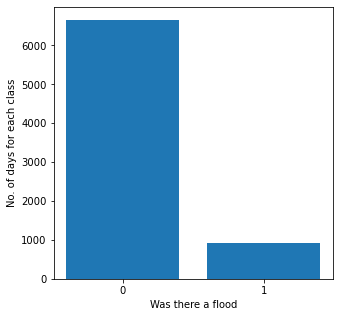

In [79]:
fig = plt.figure(figsize = (5, 5))
plt.bar(values.index, values.values)
plt.xticks([0, 1])
plt.xlabel("Was there a flood")
plt.ylabel("No. of days for each class")
plt.show()

#### Class balance - conclusion

#### Class balance - conclusion
We see that the classes are not balanced and that this will significantly affect the results of the model. This problem of unbalanced classes will be solved in the continuation of the project.

### Flood occurrences

In the plot below, we can see that after 20015. we have no days in which floods occurred. 

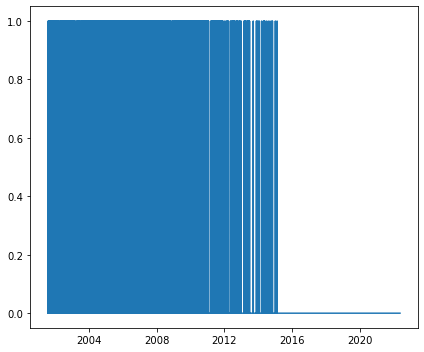

[]

In [107]:
plt.figure(figsize=(6, 5))
plt.plot(df["date"], df['class'])
plt.tight_layout()
plt.show()
ax_list